In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
# Define the Function to Parse Output Files
def parse_output_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Initialize data structures for both float and double
    data_float = {'Run': [], 'Computed_Time': []}
    data_double = {'Run': [], 'Computed_Time': []}
    current_data = None
    run_count_float = 0
    run_count_double = 0

    for line in lines:
        if "Running Float Version" in line:
            current_data = data_float
        elif "Running Double Version" in line:
            current_data = data_double
        elif "Run" in line and "Float" in line:
            run_count_float += 1
        elif "Run" in line and "Double" in line:
            run_count_double += 1
        elif ',' in line:
            parts = line.split(',')
            if len(parts) == 3:
                computed_time = float(parts[1].strip())
                if current_data is data_float:
                    current_data['Run'].append(run_count_float)
                    current_data['Computed_Time'].append(computed_time)
                elif current_data is data_double:
                    current_data['Run'].append(run_count_double)
                    current_data['Computed_Time'].append(computed_time)

    return pd.DataFrame(data_float), pd.DataFrame(data_double)

In [4]:
# Define the Function to Plot Data
def plot_data(df_float, df_double):
    plt.figure(figsize=(12, 6))
    plt.plot(df_float['Run'], df_float['Computed_Time'], label='Float Computed Time (s)', marker='o', color='blue')
    plt.plot(df_double['Run'], df_double['Computed_Time'], label='Double Computed Time (s)', marker='^', color='red')
    plt.title('Computed Execution Time per Run')
    plt.xlabel('Run Number')
    plt.ylabel('Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

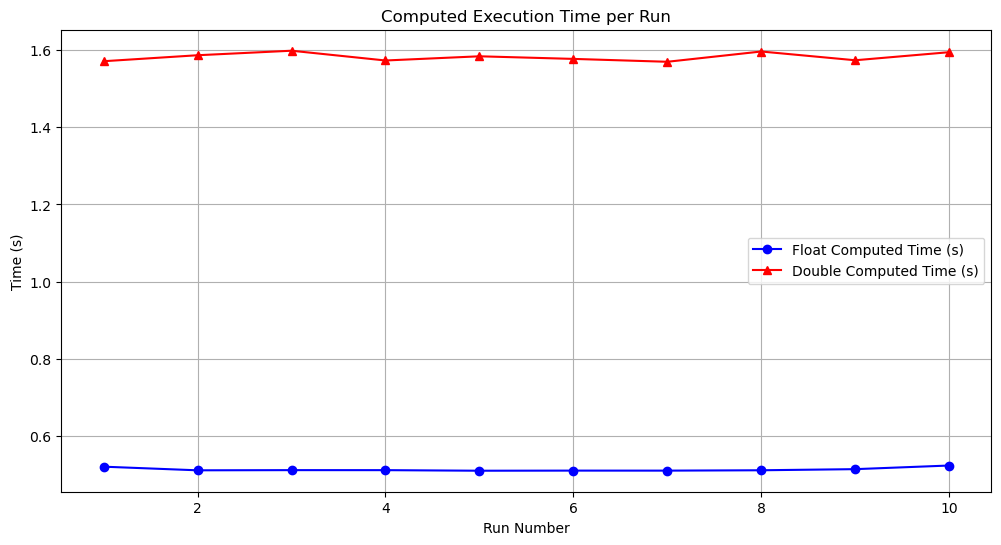

In [5]:
filename = 'omp_vectorized_benchmark_100579.out'  # Change to your actual file name
df_float, df_double = parse_output_file(filename)
plot_data(df_float, df_double)
